In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn import preprocessing

In [3]:
#!pip freeze

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
train_data.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [6]:
train_data.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965
54272,54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed A/T,Black,Black,None reported,Yes,37499


In [7]:
train_data.shape

(54273, 13)

In [8]:
pd.unique(test_data['clean_title'])

array(['Yes'], dtype=object)

In [9]:
pd.unique(train_data['accident'])

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [10]:
pd.unique(train_data['transmission'])

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Spe

In [11]:
print(len(pd.unique(train_data['model'])))
pd.unique(train_data['model'])

1827


array(['F-150 Lariat', '335 i', 'XF Luxury', ...,
       'Q4 e-tron Sportback Premium', 'Countryman Cooper', 'S-10 LS'],
      dtype=object)

In [12]:
print(len(pd.unique(train_data['engine'])))
pd.unique(train_data['engine'])

1061


array(['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel', ..., '3.0L',
       '3.0 Liter GTDI',
       '120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capability'],
      dtype=object)

<Axes: ylabel='price'>

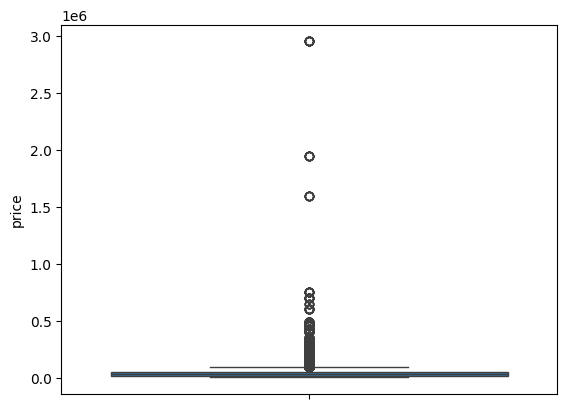

In [13]:
sns.boxplot(train_data['price'])

<Axes: ylabel='price'>

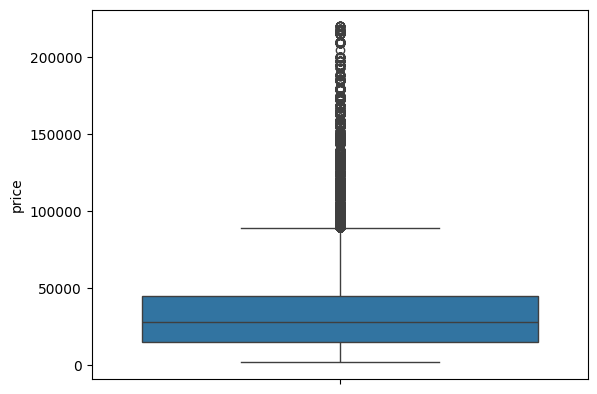

In [14]:
train_data = train_data[train_data['price'] <= 220000]
sns.boxplot(train_data['price'])

In [15]:
a = ['–','F','6 Speed At/Mt','Variable','SCHEDULED FOR OR IN PRODUCTION']

train_data = train_data[~train_data['transmission'].isin(a)]
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


<Axes: ylabel='Frequency'>

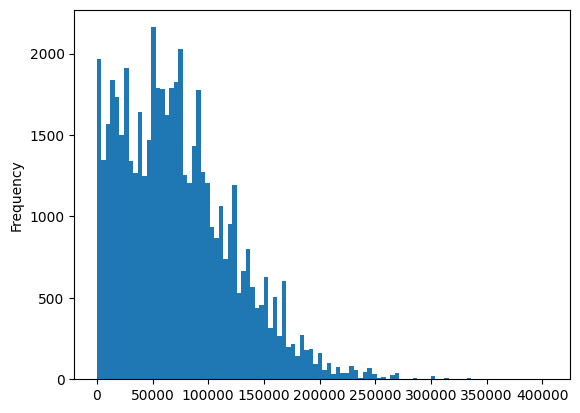

In [16]:
train_data['milage'].plot.hist(bins=100)

In [17]:
train_data = train_data[train_data['milage'] < 270000]
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


<Axes: xlabel='model_year', ylabel='Count'>

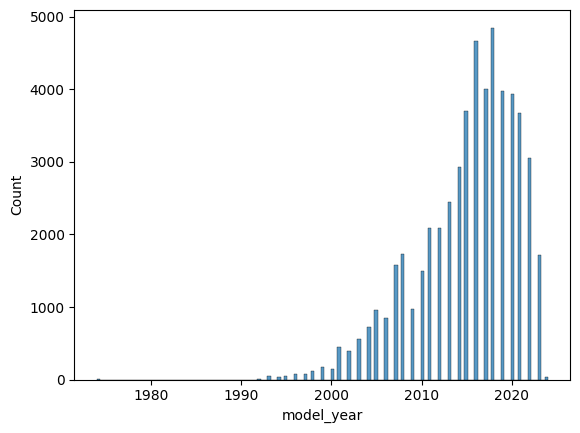

In [18]:
sns.histplot(data=train_data, x='model_year')

In [19]:
# train_data = train_data[train_data['model_year'] > 1980]
# train_data.head()

In [20]:
y = train_data['price']
train_data = train_data.drop(['price','id'], axis=1)

In [21]:
test_id = test_data['id']
test_data = test_data.drop(['id'], axis=1)

In [22]:
def extract(string, query):
    x = re.search(query, string)
    if x == None:
        return 0
    else:
        return(x.group(1))

def data_cleaning(data):
    data['HP'] = data['engine'].apply(lambda x: extract(x,'(.*)HP'))
    data['CC'] = data['engine'].apply(lambda x: extract(x,'HP (.*)L'))
    data['Cyl'] = data['engine'].apply(lambda x: extract(x,'L (.*) Cyl'))
    data = data.drop(['clean_title', 'int_col'], axis=1)
    # data = data.drop(['engine', 'model', 'clean_title'], axis=1)
    data['transmission'] = data['transmission'].apply(lambda x: re.sub('A/T','Automatic', x))
    data['transmission'] = data['transmission'].apply(lambda x: re.sub('At','Automatic', x))    
    data['transmission'] = data['transmission'].apply(lambda x: re.sub('M/T','Manual', x))
    data['transmission'] = data['transmission'].apply(lambda x: re.sub('Mt','Manual', x))
    data['transmission'] = data['transmission'].apply(lambda x: re.sub('6 Speed','6-Speed', x))
    # data['transmission'] = data['transmission'].apply(lambda x: re.sub('Automatic CVT', 'CVT Transmission', x))
    data['transmission'] = data['transmission'].apply(lambda x: re.sub('CVT-F', 'CVT Transmission', x))
    # data['transmission'] = data['transmission'].apply(lambda x: re.sub('Variable', 'CVT Transmission', x))
    # data['transmission'] = data['transmission'].apply(lambda x: re.sub('Transmission Overdrive Switch', 'Automatic', x))
    
    return data

In [23]:
train_data = data_cleaning(train_data)
train_data.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,accident,HP,CC,Cyl
54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed Automatic,White,None reported,445.0,4.4,8
54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed Automatic,Black,At least 1 accident or damage reported,220.0,2.0,4
54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,At least 1 accident or damage reported,420.0,3.6,V6
54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,None reported,0,0,0
54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed Automatic,Black,None reported,261.0,2.0,4


In [24]:
train_data.iloc[1218]

brand                                                 Porsche
model                                              Panamera 2
model_year                                               2011
milage                                                 103010
fuel_type                                            Gasoline
engine          300.0HP 3.6L V6 Cylinder Engine Gasoline Fuel
transmission                                        Automatic
ext_col                                                 Beige
accident                                        None reported
HP                                                      300.0
CC                                                        3.6
Cyl                                                        V6
Name: 1232, dtype: object

In [25]:
train_data.groupby(['transmission']).count()

,brand,model,model_year,milage,fuel_type,engine,ext_col,accident,HP,CC,Cyl
transmission,,,,,,,,,,,
1-Speed Automatic,65,65,65,65,65,65,65,65,65,65,65
10-Speed Automatic,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783
10-Speed Automatic with Overdrive,5,5,5,5,5,5,5,5,5,5,5
2-Speed Automatic,4,4,4,4,4,4,4,4,4,4,4
4-Speed Automatic,764,764,764,764,764,764,764,764,764,764,764
5-Speed Automatic,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200
5-Speed Manual,716,716,716,716,716,716,716,716,716,716,716
6-Speed,2,2,2,2,2,2,2,2,2,2,2
6-Speed Automatic,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432


In [26]:
# train_data['Speed'] = train_data['transmission'].apply(lambda x: extract(x,'(.*)-Speed'))
# pd.unique(train_data['Speed == None)])

In [27]:
test_data = data_cleaning(test_data)
test_data.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,accident,HP,CC,Cyl
36178,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed Automatic,Gray,None reported,420.0,6.2,8
36179,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed Automatic,Red,At least 1 accident or damage reported,295.0,5.3,8
36180,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed Manual,Beige,None reported,132.0,1.8,4
36181,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed Automatic,Black,None reported,450.0,3.5,V6
36182,Chevrolet,Tahoe LT,2012,162731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Black,At least 1 accident or damage reported,320.0,5.3,8


In [28]:
combined_data = pd.concat(objs=[train_data, test_data], axis=0)
processed_data = pd.get_dummies(combined_data)

train_objs_num = len(train_data)
train_data = processed_data[:train_objs_num]
test_data = processed_data[train_objs_num:]

In [29]:
X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_val.shape)

(42909, 3723)
(10728, 3723)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
# X_train = scaler.fit_transform(X_train)

In [32]:
# X_val = scaler.transform(X_val)

In [33]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

predictions_lr = model_lr.predict(X_val) 

# model evaluation 
print( 
  'RMSE: ', root_mean_squared_error(y_val, predictions_lr)) 

RMSE:  111635572.21493387


In [34]:
min(predictions_lr)

-7276499682.453842

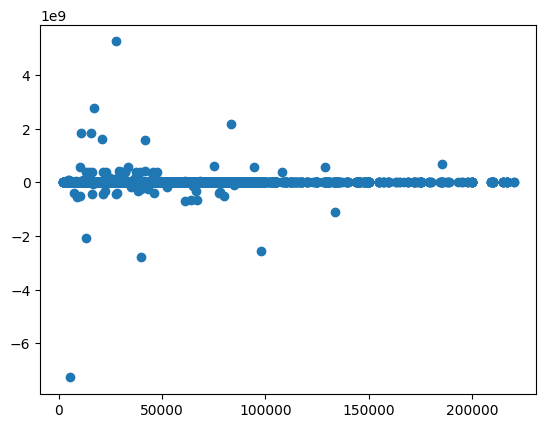

In [35]:
plt.scatter(y_val,predictions_lr)

In [36]:
residuals = y_val-predictions_lr
print(residuals)

47720     6072.971985
37492      661.334259
28845    -6514.316345
48198    -1041.571503
11630   -21836.405548
             ...     
48825    -4452.060181
48896    -2387.404205
35785      948.290497
35569    -3160.231537
24104    -1465.056244
Name: price, Length: 10728, dtype: float64


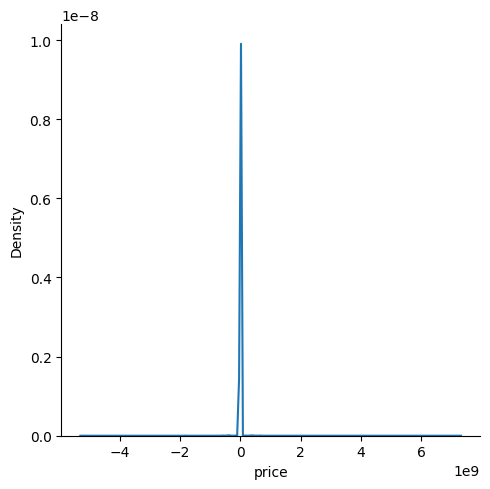

In [37]:
sns.displot(residuals, kind="kde")

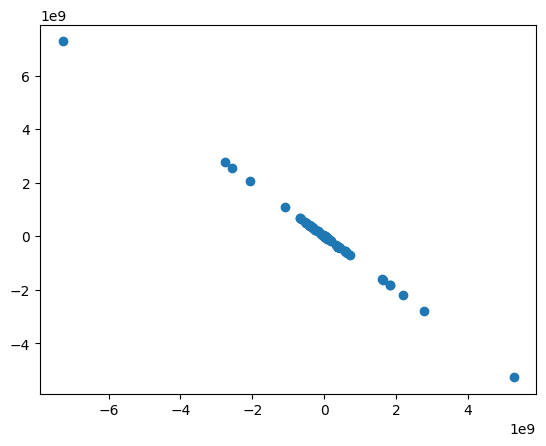

In [38]:
plt.scatter(predictions_lr, residuals)

In [1822]:
# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=2,subsample=1.0)
# gbr.fit(X_train,y_train)

# predictions_gbr = gbr.predict(X_val)

# # model evaluation 
# print( 
#   'RMSE: ', root_mean_squared_error(y_val, predictions_gbr)) 

# 22637 - (n_estimators=1000, max_depth=2,subsample=0.9)
# 22716 - (n_estimators=1000, max_depth=3,subsample=0.9)
# 22562 - (n_estimators=1000, max_depth=2,subsample=1.0)

In [1823]:
import xgboost
from xgboost import XGBRegressor

# best params
model_xgb = XGBRegressor(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.6)
# model_xgb = XGBRegressor(n_estimators=1000, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_xgb.fit(X_train,y_train)

# # 22736 - (n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22977 - (n_estimators=1000, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22720 - (n_estimators=1000, max_depth=4, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22590 - (n_estimators=1000, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22573 - (n_estimators=1000, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22755 - (n_estimators=2000, max_depth=1, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22581 - (n_estimators=1500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# # 22674 - (n_estimators=1500, max_depth=2, eta=0.2, subsample=0.7, colsample_bytree=0.8)
# # 22583 - (n_estimators=1000, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.7)
# # 22878 - (n_estimators=1000, eta=0.1, booster='gbtree')
# # 22492 - (n_estimators=1000, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# 20400 (excl int_col)

predictions_xgb = model_xgb.predict(X_val)

# # model evaluation 
print( 
  'RMSE: ', root_mean_squared_error(y_val, predictions_xgb)) 

RMSE:  20441.021075178098


In [1781]:
# from sklearn.model_selection import GridSearchCV

# # param_grid = { 'n_estimators': [500, 1000, 1500, 2000, 2500], 
#                # 'max_depth': [2, 4],
#                # 'eta': [0.1, 0.2, 0.3], 
#                # 'subsample': [0.5, 0.7], 
               

# param_grid = { 'booster':['gbtree', 'gblinear', 'dart'],
#               'colsample_bytree':[0.3, 0.6, 0.9],
#               'n_estimators': [100, 300, 500]
#               }

# model_xgb_grid = GridSearchCV(XGBRegressor(max_depth=2, eta=0.1, subsample=0.7), param_grid, scoring = 'neg_root_mean_squared_error')
# model_xgb_grid.fit(X_train,y_train)

# model_xgb_grid.best_params_

In [1782]:
# model_xgb_grid.best_params_

In [1783]:
# model_xgb_grid.best_estimator_

In [1784]:
# from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
# from sklearn.gaussian_process import GaussianProcessRegressor

# # Determination of the kernel used and the value lenght_scale at which the optimization process starts
# kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# # Application of the regressor (alpha makes a statement about a possible noise of the training data)
# gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
# gp.fit(X_train, y_train)

# # Prediction of the dependent variable for the test dataset
# predictions_gp, sigma = gp.predict(X_val, return_std=True)

# # model evaluation 
# print( 
#   'RMSE: ', root_mean_squared_error(y_val, predictions_gp)) 

In [1785]:
# from sklearn.svm import SVR

# # Choose regression method and set hyperparameter
# svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')

# # Training of the regression model
# svr_rbf.fit(X_train, y_train)

# predictions_svr = svr_rbf.predict(X_val)

# # model evaluation - 29617
# print( 
#   'RMSE: ', root_mean_squared_error(y_val, predictions_svr)) 

In [1786]:
# from sklearn.linear_model import Lasso
#
# model3 = Lasso()
# model3.fit(X_train,y_train)

In [1787]:
# predictions3 = model3.predict(X_val)

# model evaluation 
# print( 
#   'RMSE: ', root_mean_squared_error(y_val, predictions3)) 

In [1788]:
# from sklearn.ensemble import RandomForestRegressor

# # define used regressor
# forest=RandomForestRegressor(n_estimators=35,
#                              max_depth=25,
#                              criterion='squared_error',
#                             )

# # train model
# forest.fit(X_train,y_train)

# 23253

In [1789]:
# predictions_rf = forest.predict(X_val)

# # model evaluation 
# print( 
#   'RMSE: ', root_mean_squared_error(y_val, predictions_rf)) 